## Importing libraries

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from six.moves import urllib
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
clear_output()

## Importing datasets

Unlike typical datasets, these set of files have been split into train, test and gender datasets (downloaded from Kaggle - probably to simplify things for beginners). That said, let's give it a try.

In [2]:
train_data = pd.read_csv('datasets/titanic/train.csv')
test_data = pd.read_csv('datasets/titanic/test.csv')
gender_data = pd.read_csv('datasets/titanic/gender_submission.csv')

Let's see how they look like.

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
gender_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
gender_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


The dataset "test" and "gender submission" does not seem to work well seperately. Hence, we'll do a tiny little bit of preprocessing by combining both datasets to create a better test dataset

In [9]:
full_test_data = pd.concat([test_data, gender_data['Survived']], axis=1)
full_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


Still, the accuracy of our model may take a hit due to the way the train and test data are split by default. Passengers 1 to 891 may not accurately be equivalent to what happened to passengers 892 to 1309

We'll go ahead to combine all three datasets

In [10]:
robust_dataset = pd.concat([train_data, full_test_data], axis = 0)
robust_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
robust_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


Much, much better. All in one place. Now we can move on to viewing our data using charts, histograms, and plots

# Data Visualization

Question 1: What was the age and sex of most of the passengers?

Text(0.5, 0, 'Age')

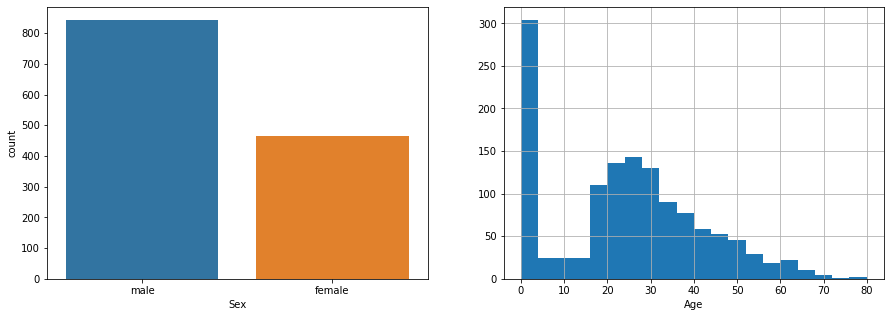

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(robust_dataset.Sex, ax=ax1)
#sns.countplot(robust_dataset.Age, ax=axes[0][1])
robust_dataset.Age.hist(bins = 20, ax=ax2).set_xlabel('Age')

- The majority of passengers were in their 20's
- The majority of passengers were men

Question 2: How many people survived? Was their survival influenced by their age, sex, or class they were travelling in?

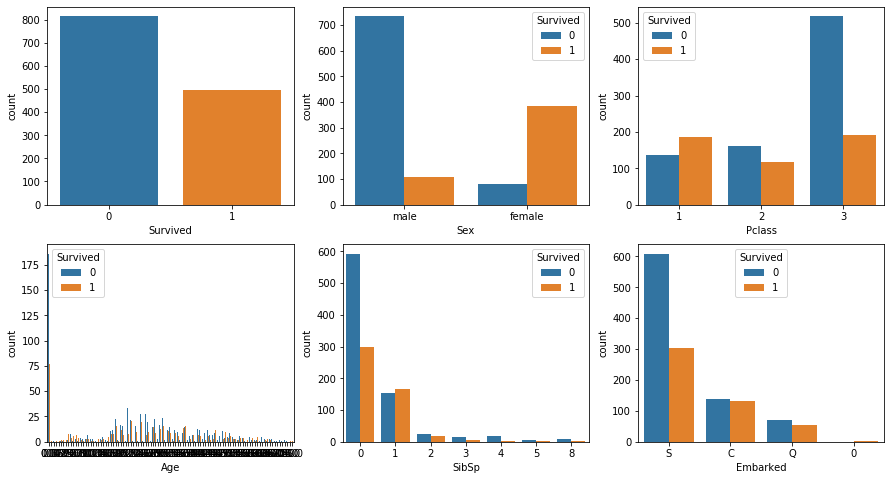

In [50]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
sns.countplot(robust_dataset['Survived'], ax=axes[0][0])
sns.countplot(x='Sex', hue='Survived', data=robust_dataset, ax=axes[0][1])
sns.countplot(x='Pclass', hue='Survived', data=robust_dataset, ax=axes[0][2])
sns.countplot(x='Age', hue='Survived', data=robust_dataset, ax=axes[1][0])
sns.countplot(x='SibSp', hue='Survived', data=robust_dataset, ax=axes[1][1])
sns.countplot(x='Embarked', hue='Survived', data=robust_dataset, ax=axes[1][2])

- Females have higher chance of survival compared to men
- Passengers in first class also have an higher chance of survival, followed by second class.

Other insights derived from the data:

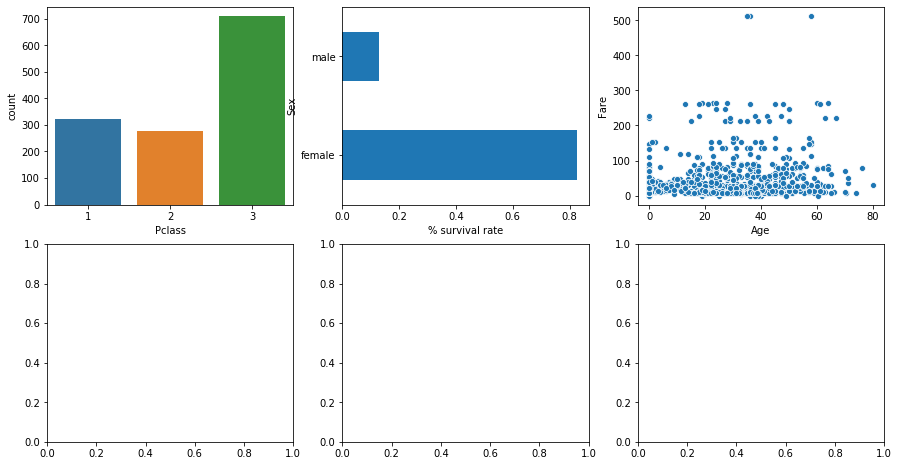

In [56]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

sns.countplot(robust_dataset.Pclass, ax=axes[0][0])
robust_dataset.groupby('Sex').Survived.mean().plot(kind='barh', ax=axes[0][1]).set_xlabel('% survival rate')
sns.scatterplot(data=robust_dataset, x='Age', y='Fare', ax=axes[0][2])

# Data Preprocessing

In [18]:
# check for nan values
robust_dataset.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [19]:
# fill nan values
robust_dataset['Age'].fillna(0, inplace=True)
robust_dataset['Fare'].fillna(0, inplace=True)
robust_dataset['Cabin'].fillna(0, inplace=True)
robust_dataset['Embarked'].fillna(0, inplace=True)

In [20]:
# split into train and test/eval
X = robust_dataset.drop(['Survived', 'PassengerId', 'Name', 'Cabin', 'Embarked'], axis = 1)
y = robust_dataset['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

Create feature columns

In [21]:
CATEGORICAL_COLUMNS = ['Pclass', 'Sex', 'SibSp', 'Parch'] # , 'Cabin', 'Embarked'   - have nan. produces error
NUMERIC_COLUMNS = ['Age', 'Fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = X_train[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='Pclass', vocabulary_list=(3, 1, 2), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='SibSp', vocabulary_list=(0, 1, 5, 4, 2, 8, 3), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Parch', vocabulary_list=(0, 1, 2, 3, 6, 5, 9, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Fare', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


# Training

### Creating Epochs

An **epoch** represents one stream of our entire dataset. For example, if we have 10 epochs, our model will see the same dataset 10 times. We use epochs in hope that after seeing the same data multiple times, the model will better determing how to estimate it. 

For this specific model, the entire dataset is not going to be fed into our model at once, but simply small batches of entries. In this case, batches of 32.

In [22]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    '''the input function defines how the data would be broken into epochs and batches to feed into the model'''
    def input_function(): # inner function, this will be returned
        # create tf.data.Dataset object with data and its label
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000) # ramdomize order of data
        
        # split dataset into batches of 32 and repeat process for number of epochs
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds # return a batch of the dataset
    return input_function # return a function object for use

# call the input_function that was returned to get a dataset object we can feed into the model
train_input_fn = make_input_fn(X_train, y_train)
test_input_fn = make_input_fn(X_test, y_test, num_epochs=1, shuffle=False)

### Creating the Model

#### Linear estimator (Linear Regression)

In [23]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

linear_est.train(train_input_fn)
result = linear_est.evaluate(test_input_fn)

clear_output()
print(result['accuracy'])

0.8549618
